# 1. Install and load the necessary packages
All the packages needed from crawling to sentiment analysis can be found on this section

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import json
from urllib.request import urlopen
from pandas.io.json import json_normalize
from google_play_scraper import app, Sort, reviews
from app_store_scraper import AppStore
from pprint import pprint
import urllib3
import xmltodict
import time
from textblob import TextBlob

from tqdm import tqdm
from pygments import highlight
from pygments.lexers import JsonLexer
from pygments.formatters import TerminalFormatter

# 2. Extract data and create dataset
In this section we will extract all the related reviews from App Store and Google Play Store. Then we will select the necessary columns and generate the final dataset to perform our analysis

In [2]:
# #########                     EXTRACT REVIEWS FROM APP STORE                     #########

# # Let's extract all the reviews from the selected apps present on the App Store (Apple)

# # Select the app names and unique identifiers in the App Store
# #   Example for SoundID app: https://apps.apple.com/us/app/soundid-profile-creation/id1490569267 
names_ios = ['albo-reemplaza-a-tu-banco' ,'cuenca-alternativa-a-un-banco', 'klar','fondeadora-libérate-del-banco','hey-banco']
ids_ios = [1038240859,1447995379,1472755899,1438141144,1335704361]

# ## Get all the stores
store_list = ['DZ', 'AO', 'AI', 'AG', 'AR', 'AM', 'AU', 'AT', 'AZ', 'BH', 'BY', 'BE', 'BB',
'BZ', 'BM', 'BO', 'BW', 'BR', 'VG', 'BN', 'BG', 'CA', 'KY', 'CL', 'CN', 'CO', 'CR',
 'HR', 'CY', 'CZ', 'DK', 'DM', 'DO', 'EC', 'EG', 'SV', 'EE', 'FI', 'FR', 'DE',
'GH', 'GR', 'GD', 'GT', 'GY', 'HN', 'HK', 'HU', 'IS', 'IN', 'ID', 'IE', 'IL', 'IT',
'JM', 'JP', 'JO', 'KZ', 'KE', 'KR', 'KW', 'LV', 'LB', 'LT', 'LU', 'MO', 'MK',
'MG', 'MY', 'ML', 'MT', 'MU', 'MX', 'MD', 'MS', 'NP', 'NL', 'NZ', 'NI', 'NE',
'NG', 'NO', 'OM', 'PK', 'PA', 'PY', 'PE', 'PH', 'PL', 'PT', 'QA', 'RO', 'RU', 'SA',
'SN', 'SG', 'SK', 'SI', 'ZA', 'ES', 'LK', 'KN', 'LC', 'VC', 'SR', 'SE', 'CH',
'TW', 'TZ', 'TH', 'BS', 'TT', 'TN', 'TR', 'TC', 'UG', 'GB', 'UA', 'AE', 'UY', 'US',
 'UZ', 'VE', 'VN', 'YE']


#Scrap data from App Store
def crawl_ios(store_list, app_name, app_id):
    # check if store has any reviews
    valid_stores = []
    for i in store_list:
        url = f"https://itunes.apple.com/{i}/rss/customerreviews/id={app_id}/json"
        response = urlopen(url)
        data = response.read()
        data = json.loads(data)
        if data.get('feed').get('entry') == None:
            print(i+' has no reviews')
        else:
            valid_stores.append(i)
            print(i + ' has reviews')
    df=pd.DataFrame()
    name = app_name
    for i in valid_stores:
        country = i
        get_ios = AppStore(country=country, app_name=name)
        get_ios.review()
        df = df.append(pd.DataFrame(get_ios.reviews))
        df = df.assign(App=name)
    return df

# Extract all the reviews only from the countries where there's at least 1 review and create data frame
app_store_reviews = pd.DataFrame()
for num,i in enumerate(names_ios):
    appname =  names_ios[num]
    appid = ids_ios[num]
    print(f'Crawling ios appstore reviews for {appname} app ')
    
    app_store_reviews = app_store_reviews.append(crawl_ios(store_list,appname,appid ))    

Crawling ios appstore reviews for albo-reemplaza-a-tu-banco app 
DZ has no reviews
AO has no reviews
AI has no reviews
AG has no reviews
AR has reviews
AM has no reviews
AU has no reviews
AT has no reviews
AZ has no reviews
BH has no reviews
BY has no reviews
BE has no reviews
BB has no reviews
BZ has no reviews
BM has no reviews
BO has no reviews
BW has no reviews
BR has no reviews
VG has no reviews
BN has no reviews
BG has no reviews
CA has no reviews
KY has no reviews
CL has no reviews
CN has no reviews
CO has reviews
CR has no reviews
HR has no reviews
CY has no reviews
CZ has no reviews
DK has no reviews
DM has no reviews
DO has no reviews
EC has no reviews
EG has no reviews
SV has no reviews
EE has no reviews
FI has no reviews
FR has no reviews
DE has no reviews
GH has no reviews
GR has no reviews
GD has no reviews
GT has no reviews
GY has no reviews
HN has no reviews
HK has no reviews
HU has no reviews
IS has no reviews
IN has no reviews
ID has no reviews
IE has no reviews
IL ha

2020-11-25 10:54:42,601 [INFO] Base - Searching for app id


YE has no reviews


2020-11-25 10:54:44,088 [INFO] Base - Initialised: AppStore('ar', 'albo-reemplaza-a-tu-banco', 1038240859)
2020-11-25 10:54:44,089 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/ar/app/albo-reemplaza-a-tu-banco/id1038240859
2020-11-25 10:54:44,258 [INFO] Base - [id:1038240859] Fetched 1 reviews (1 fetched in total)
2020-11-25 10:54:44,262 [INFO] Base - Searching for app id
2020-11-25 10:54:45,783 [INFO] Base - Initialised: AppStore('co', 'albo-reemplaza-a-tu-banco', 1038240859)
2020-11-25 10:54:45,784 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/co/app/albo-reemplaza-a-tu-banco/id1038240859
2020-11-25 10:54:45,953 [INFO] Base - [id:1038240859] Fetched 1 reviews (1 fetched in total)
2020-11-25 10:54:45,958 [INFO] Base - Searching for app id
2020-11-25 10:54:47,444 [INFO] Base - Initialised: AppStore('mx', 'albo-reemplaza-a-tu-banco', 1038240859)
2020-11-25 10:54:47,446 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/mx/app/albo-r

Crawling ios appstore reviews for cuenca-alternativa-a-un-banco app 
DZ has no reviews
AO has no reviews
AI has no reviews
AG has no reviews
AR has reviews
AM has no reviews
AU has no reviews
AT has no reviews
AZ has no reviews
BH has no reviews
BY has no reviews
BE has no reviews
BB has no reviews
BZ has no reviews
BM has no reviews
BO has no reviews
BW has no reviews
BR has no reviews
VG has no reviews
BN has no reviews
BG has no reviews
CA has no reviews
KY has no reviews
CL has no reviews
CN has no reviews
CO has no reviews
CR has no reviews
HR has no reviews
CY has no reviews
CZ has no reviews
DK has no reviews
DM has no reviews
DO has no reviews
EC has no reviews
EG has no reviews
SV has reviews
EE has no reviews
FI has no reviews
FR has no reviews
DE has no reviews
GH has no reviews
GR has no reviews
GD has no reviews
GT has no reviews
GY has no reviews
HN has no reviews
HK has no reviews
HU has no reviews
IS has no reviews
IN has no reviews
ID has no reviews
IE has no reviews
I

2020-11-25 10:55:20,611 [INFO] Base - Searching for app id


YE has no reviews


2020-11-25 10:55:24,014 [INFO] Base - Initialised: AppStore('ar', 'cuenca-alternativa-a-un-banco', 1447995379)
2020-11-25 10:55:24,015 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/ar/app/cuenca-alternativa-a-un-banco/id1447995379
2020-11-25 10:55:24,186 [INFO] Base - [id:1447995379] Fetched 8 reviews (8 fetched in total)
2020-11-25 10:55:24,190 [INFO] Base - Searching for app id
2020-11-25 10:55:25,668 [INFO] Base - Initialised: AppStore('sv', 'cuenca-alternativa-a-un-banco', 1447995379)
2020-11-25 10:55:25,668 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/sv/app/cuenca-alternativa-a-un-banco/id1447995379
2020-11-25 10:55:25,828 [INFO] Base - [id:1447995379] Fetched 1 reviews (1 fetched in total)
2020-11-25 10:55:25,833 [INFO] Base - Searching for app id
2020-11-25 10:55:27,336 [INFO] Base - Initialised: AppStore('mx', 'cuenca-alternativa-a-un-banco', 1447995379)
2020-11-25 10:55:27,337 [INFO] Base - Ready to fetch reviews from: https://apps.app

Crawling ios appstore reviews for klar app 
DZ has no reviews
AO has no reviews
AI has no reviews
AG has no reviews
AR has no reviews
AM has no reviews
AU has no reviews
AT has no reviews
AZ has no reviews
BH has no reviews
BY has no reviews
BE has no reviews
BB has no reviews
BZ has no reviews
BM has no reviews
BO has no reviews
BW has no reviews
BR has no reviews
VG has no reviews
BN has no reviews
BG has no reviews
CA has no reviews
KY has no reviews
CL has no reviews
CN has no reviews
CO has no reviews
CR has no reviews
HR has no reviews
CY has no reviews
CZ has no reviews
DK has no reviews
DM has no reviews
DO has no reviews
EC has no reviews
EG has no reviews
SV has no reviews
EE has no reviews
FI has no reviews
FR has no reviews
DE has no reviews
GH has no reviews
GR has no reviews
GD has no reviews
GT has no reviews
GY has no reviews
HN has no reviews
HK has no reviews
HU has no reviews
IS has no reviews
IN has no reviews
ID has no reviews
IE has no reviews
IL has no reviews
IT

2020-11-25 10:56:00,632 [INFO] Base - Searching for app id


VN has no reviews
YE has no reviews


2020-11-25 10:56:02,277 [INFO] Base - Initialised: AppStore('mx', 'klar', 1472755899)
2020-11-25 10:56:02,277 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/mx/app/klar/id1472755899
2020-11-25 10:56:07,392 [INFO] Base - [id:1472755899] Fetched 600 reviews (600 fetched in total)
2020-11-25 10:56:12,721 [INFO] Base - [id:1472755899] Fetched 1240 reviews (1240 fetched in total)
2020-11-25 10:56:17,986 [INFO] Base - [id:1472755899] Fetched 1840 reviews (1840 fetched in total)
2020-11-25 10:56:23,287 [INFO] Base - [id:1472755899] Fetched 2460 reviews (2460 fetched in total)
2020-11-25 10:56:28,549 [INFO] Base - [id:1472755899] Fetched 3060 reviews (3060 fetched in total)
2020-11-25 10:56:33,852 [INFO] Base - [id:1472755899] Fetched 3680 reviews (3680 fetched in total)
2020-11-25 10:56:37,684 [INFO] Base - [id:1472755899] Fetched 4137 reviews (4137 fetched in total)
2020-11-25 10:56:37,696 [INFO] Base - Searching for app id
2020-11-25 10:56:39,036 [INFO] Base - Initialised

Crawling ios appstore reviews for fondeadora-libérate-del-banco app 
DZ has no reviews
AO has no reviews
AI has no reviews
AG has no reviews
AR has no reviews
AM has no reviews
AU has no reviews
AT has no reviews
AZ has no reviews
BH has no reviews
BY has no reviews
BE has no reviews
BB has no reviews
BZ has no reviews
BM has no reviews
BO has no reviews
BW has no reviews
BR has no reviews
VG has no reviews
BN has no reviews
BG has no reviews
CA has no reviews
KY has no reviews
CL has no reviews
CN has no reviews
CO has reviews
CR has no reviews
HR has no reviews
CY has no reviews
CZ has no reviews
DK has no reviews
DM has no reviews
DO has no reviews
EC has no reviews
EG has no reviews
SV has no reviews
EE has no reviews
FI has no reviews
FR has no reviews
DE has no reviews
GH has no reviews
GR has no reviews
GD has no reviews
GT has no reviews
GY has no reviews
HN has no reviews
HK has no reviews
HU has no reviews
IS has no reviews
IN has no reviews
ID has no reviews
IE has no review

2020-11-25 10:57:05,898 [INFO] Base - Searching for app id


YE has no reviews


2020-11-25 10:57:07,768 [INFO] Base - Initialised: AppStore('co', 'fondeadora-libérate-del-banco', 1438141144)
2020-11-25 10:57:07,768 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/co/app/fondeadora-libérate-del-banco/id1438141144
2020-11-25 10:57:07,932 [INFO] Base - [id:1438141144] Fetched 1 reviews (1 fetched in total)
2020-11-25 10:57:07,935 [INFO] Base - Searching for app id
2020-11-25 10:57:09,351 [INFO] Base - Initialised: AppStore('it', 'fondeadora-libérate-del-banco', 1438141144)
2020-11-25 10:57:09,352 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/it/app/fondeadora-libérate-del-banco/id1438141144
2020-11-25 10:57:09,542 [INFO] Base - [id:1438141144] Fetched 1 reviews (1 fetched in total)
2020-11-25 10:57:09,546 [INFO] Base - Searching for app id
2020-11-25 10:57:10,845 [INFO] Base - Initialised: AppStore('mx', 'fondeadora-libérate-del-banco', 1438141144)
2020-11-25 10:57:10,846 [INFO] Base - Ready to fetch reviews from: https://apps.app

Crawling ios appstore reviews for hey-banco app 
DZ has no reviews
AO has no reviews
AI has no reviews
AG has no reviews
AR has no reviews
AM has no reviews
AU has no reviews
AT has no reviews
AZ has no reviews
BH has no reviews
BY has no reviews
BE has no reviews
BB has no reviews
BZ has no reviews
BM has no reviews
BO has no reviews
BW has no reviews
BR has no reviews
VG has no reviews
BN has no reviews
BG has no reviews
CA has no reviews
KY has no reviews
CL has no reviews
CN has no reviews
CO has no reviews
CR has no reviews
HR has no reviews
CY has no reviews
CZ has no reviews
DK has no reviews
DM has no reviews
DO has no reviews
EC has no reviews
EG has no reviews
SV has no reviews
EE has no reviews
FI has no reviews
FR has no reviews
DE has no reviews
GH has no reviews
GR has no reviews
GD has no reviews
GT has no reviews
GY has no reviews
HN has no reviews
HK has no reviews
HU has no reviews
IS has no reviews
IN has no reviews
ID has no reviews
IE has no reviews
IL has no revie

2020-11-25 10:57:41,231 [INFO] Base - Searching for app id


VN has no reviews
YE has no reviews


2020-11-25 10:57:42,948 [INFO] Base - Initialised: AppStore('mx', 'hey-banco', 1335704361)
2020-11-25 10:57:42,948 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/mx/app/hey-banco/id1335704361
2020-11-25 10:57:46,409 [INFO] Base - [id:1335704361] Fetched 388 reviews (388 fetched in total)
2020-11-25 10:57:46,413 [INFO] Base - Searching for app id
2020-11-25 10:57:47,890 [INFO] Base - Initialised: AppStore('us', 'hey-banco', 1335704361)
2020-11-25 10:57:47,892 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/hey-banco/id1335704361
2020-11-25 10:57:48,045 [INFO] Base - [id:1335704361] Fetched 16 reviews (16 fetched in total)


In [3]:
# Select the necessary columns and rename them
app_store_reviews = app_store_reviews[['App', 'rating', 'review']]
app_store_reviews = app_store_reviews.rename(columns={'rating': 'Rating', 'review':'Comment'})

In [4]:
# app_store_reviews

In [5]:
#########                 EXTRACT REVIEWS FROM PLAY STORE STORE                  #########

# Set up the apps (name and id) we want to get
ids_playstore = [
    'mx.intelifin.android.albo'
    ,
    'com.cuenca.cuenca_mobile'
    ,
    'mx.klar.app'
    ,
    'com.fondeadora.bank'
    ,
    'com.banregio.hey'
      ]

In [6]:
app_infos = []
for ap in tqdm(ids_playstore):
  info = app(ap, lang='en', country='us')
  del info['comments']
  app_infos.append(info)

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  2.55it/s]


In [7]:
def print_json(json_object):
  json_str = json.dumps(
    json_object,
    indent=2,
    sort_keys=True,
    default=str
  )
  print(highlight(json_str, JsonLexer(), TerminalFormatter()))

In [8]:
print_json(ids_playstore[1])

"com.cuenca.cuenca_mobile"



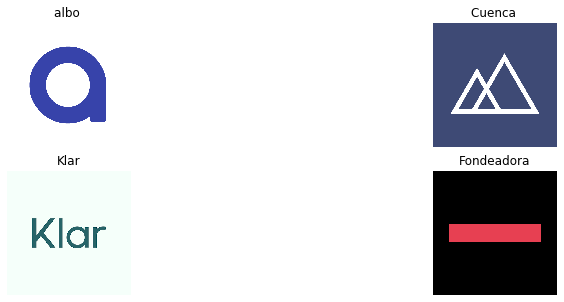

In [9]:
def format_title(title):
  sep_index = title.find(':') if title.find(':') != -1 else title.find('-')
  if sep_index != -1:
    title = title[:sep_index]
  return title[:10]
fig, axs = plt.subplots(2, len(app_infos) // 2, figsize=(14, 5))

for i, ax in enumerate(axs.flat):
  ai = app_infos[i]
  img = plt.imread(ai['icon'])
  ax.imshow(img)
  ax.set_title(format_title(ai['title']))
  ax.axis('off')

In [10]:
app_infos_df = pd.DataFrame(app_infos)
app_infos_df.to_csv('apps.csv', index=None, header=True)

In [11]:
df_playstore = []
for ap in tqdm(ids_playstore):
  for score in list(range(1, 6)):
    for sort_order in [Sort.MOST_RELEVANT, Sort.NEWEST]:
      rvs, _ = reviews(
        ap,
        lang='es',
        country='mx',
        sort=sort_order,
        count= 50000,
        filter_score_with=score
      )
      for r in rvs:
        r['sortOrder'] = 'most_relevant' if sort_order == Sort.MOST_RELEVANT else 'newest'
        r['appId'] = ap
      df_playstore.extend(rvs)

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [01:52<00:00, 22.60s/it]


In [12]:
print_json(df_playstore[0])
len(df_playstore)

{
  "appId": "mx.intelifin.android.albo",
  "at": "2020-11-19 16:42:32",
  "content": "Me desespera!! Tarda mucho en cargar! Cada que entro, mi cuenta tarda mucho cargando, cada que cambio de pesta\u00f1a, se pone a cargar de nuevo! Y es muy molesto! Aveces quiero hacer movimientos r\u00e1pidos y es tedioso entrar y tener que esperar hasta 5 minutos solo para que cargue la pesta\u00f1a de mi informaci\u00f3n de tarjeta o para depositar en un Oxxo. \u00bfPor qu\u00e9 tarda tanto en cargar?",
  "repliedAt": null,
  "replyContent": null,
  "reviewCreatedVersion": "1.23.1",
  "reviewId": "gp:AOqpTOEI3cuWlkViRT4FbatXAiPnhp4o4pfcUmmAzcNfitWBes4nhY8_nuYPtJWVOMGX5CkcJrlJ92GUBkJ0csI",
  "score": 1,
  "sortOrder": "most_relevant",
  "thumbsUpCount": 21,
  "userImage": "https://play-lh.googleusercontent.com/a-/AOh14GjIEotsHaLX0DLRVBBEBkNoY-ykZ8RbUkMjiaZt",
  "userName": "Giovann Israel"
}



37944

In [15]:
# # Select the necessary columns and rename them
# play_store_reviews = df_playstore[['App', 'Date', 'Rating', 'Comment']]
play_store_reviews = pd.DataFrame(df_playstore)[['appId', 'at', 'score', 'content']]
play_store_reviews.rename(columns={'appId':'App', 'at':'Date', 'score':'Rating', 'content':'Comment'}, inplace=True)

In [16]:
play_store_reviews.to_csv('play_store_reviews.csv')
app_store_reviews.to_csv('app_store_reviews.csv')